# THE SPARKS FOUNDATION


# GRADUATE ROTATIONAL INTERNSHIP PROGRAM ( GRIP )


# Data Science & Business Analytics Intern


# Name :- Nitish Satish Mahajan

### Task 4 :- Exploratory Data Analysis - Terrorism

Dataset :- https://bit.ly/2TK5Xn5

### Aim : Perform ' Exploratory Data Analysis ' on dataset ' Global Terrorism '.

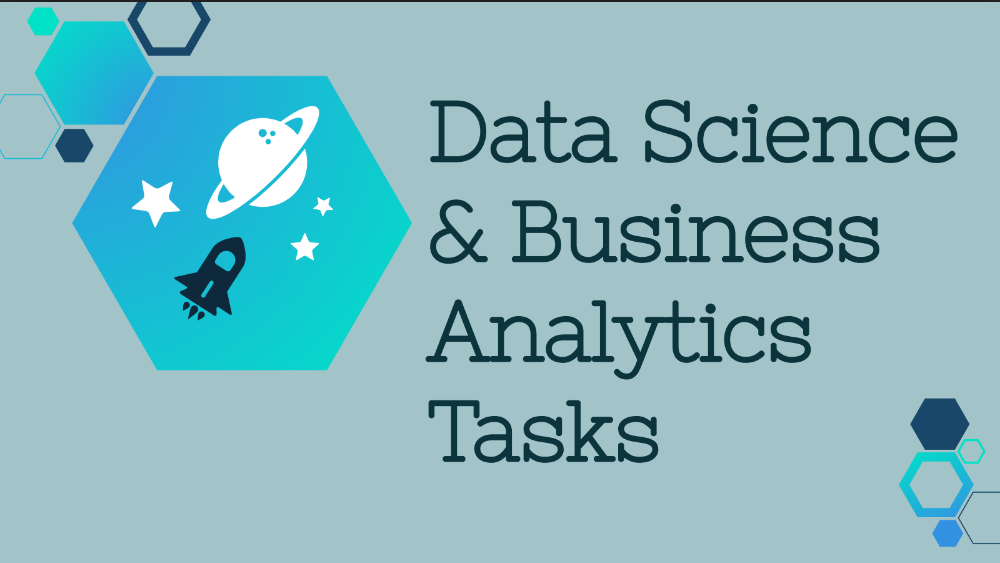

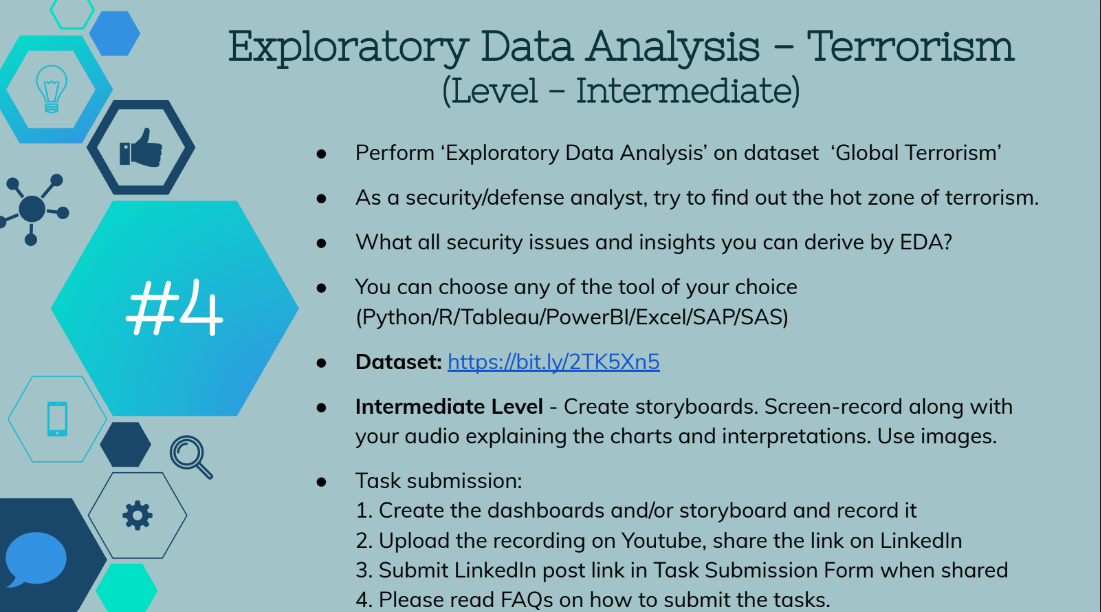

# Import the libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

import folium
from folium.plugins import MarkerCluster

# Load the dataset 

In [5]:
data =pd.read_csv("D:\Programming\Spark Foundation Tasks\globalterrorismdb_0718dist.csv")
data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [6]:
data.shape

(181691, 135)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
data.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity  ...     ransomamt   ransomamtus  \
count  1.771340e+05  181685.000000  ...  1.350000e+03  5.630000e+02   
mean  -4.586957e+02       1.451452  ...  3.172530e+06  5.784865e+05   
std    2.047790e+05       0.995430  ...  3.021157e+07  7.077924e+06   
min   -8.618590e+07       1.000000  ... -9.900000e+01 -9.900000e+01   
25%    4.545640e+00       1.000000  ...  0.000000e+00  0.000000e+00   
50%    4.324651e+01       1.000000  ...  1.500000e+04  0.000000e+00   
75%    6.871033e+01       1.000000  ...  4.000000e+05  0.000000e+00   
max    1.793667e+02       5.000000  ...  1.000000e+09  1.320000e+08   

         ransompaid  ransompaidus  hostkidoutcome     nreleased  \
count  7.740000e+02    552.000000    10991.000000  10400.000000   
mean   7.179437e+05    240.378623        4.629242    -29.018269   
std    1.014392e+07   2940.967293        2.035360     65.720119   
min   -9.900000e+01    -99.000000        1.000000    -99.000000   
25%   -9.900000e+01      0.000000        2.000000    -99.000000   
50%    0.000000e+00      0.000000        4.000000      0.000000   
75%    1.273412e+03      0.000000        7.000000      1.000000   
max    2.750000e+08  48000.000000        7.000000   2769.000000   

             INT_LOG       INT_IDEO       INT_MISC        INT_ANY  
count  181691.000000  181691.000000  181691.000000  181691.000000  
mean       -4.543731      -4.464398       0.090010      -3.945952  
std         4.543547       4.637152       0.568457       4.691325  
min        -9.000000      -9.000000      -9.000000      -9.000000  
25%        -9.000000      -9.000000       0.000000      -9.000000  
50%        -9.000000      -9.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 77 columns]

In [10]:
datareq = data[["iyear","imonth","iday","extended","country_txt","region_txt","city","location","provstate","suicide","success","attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt",'nkill','nwound']]
datareq['casualties'] = datareq['nkill'] + datareq['nwound']
datareq.head()

iyear  imonth  iday  extended         country_txt  \
0   1970       7     2         0  Dominican Republic   
1   1970       0     0         0              Mexico   
2   1970       1     0         0         Philippines   
3   1970       1     0         0              Greece   
4   1970       1     0         0               Japan   

                    region_txt           city location provstate  suicide  \
0  Central America & Caribbean  Santo Domingo      NaN       NaN        0   
1                North America    Mexico city      NaN   Federal        0   
2               Southeast Asia        Unknown      NaN    Tarlac        0   
3               Western Europe         Athens      NaN    Attica        0   
4                    East Asia        Fukouka      NaN   Fukouka        0   

   success                 attacktype1_txt                targtype1_txt  \
0        1                   Assassination  Private Citizens & Property   
1        1     Hostage Taking (Kidnapping)      Government (Diplomatic)   
2        1                   Assassination          Journalists & Media   
3        1               Bombing/Explosion      Government (Diplomatic)   
4        1  Facility/Infrastructure Attack      Government (Diplomatic)   

                                gname motive weaptype1_txt  nkill  nwound  \
0                              MANO-D    NaN       Unknown    1.0     0.0   
1  23rd of September Communist League    NaN       Unknown    0.0     0.0   
2                             Unknown    NaN       Unknown    1.0     0.0   
3                             Unknown    NaN    Explosives    NaN     NaN   
4                             Unknown    NaN    Incendiary    NaN     NaN   

   casualties  
0         1.0  
1         0.0  
2         1.0  
3         NaN  
4         NaN

In [11]:
missing_values= pd.DataFrame(datareq.isnull().sum()/datareq.shape[0] , columns=["missing_rows"])
missing_values.round(2)

missing_rows
iyear                    0.00
imonth                   0.00
iday                     0.00
extended                 0.00
country_txt              0.00
region_txt               0.00
city                     0.00
location                 0.69
provstate                0.00
suicide                  0.00
success                  0.00
attacktype1_txt          0.00
targtype1_txt            0.00
gname                    0.00
motive                   0.72
weaptype1_txt            0.00
nkill                    0.06
nwound                   0.09
casualties               0.09

In [12]:
datareq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   extended         181691 non-null  int64  
 4   country_txt      181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   city             181257 non-null  object 
 7   location         55495 non-null   object 
 8   provstate        181270 non-null  object 
 9   suicide          181691 non-null  int64  
 10  success          181691 non-null  int64  
 11  attacktype1_txt  181691 non-null  object 
 12  targtype1_txt    181691 non-null  object 
 13  gname            181691 non-null  object 
 14  motive           50561 non-null   object 
 15  weaptype1_txt    181691 non-null  object 
 16  nkill            171378 non-null  floa

In [13]:
datareq.drop("motive",axis=1,inplace=True)
datareq.drop("location",axis=1,inplace=True)

In [14]:
datareq.dropna(inplace=True)

In [15]:
datareq.isnull().sum()

iyear              0
imonth             0
iday               0
extended           0
country_txt        0
region_txt         0
city               0
provstate          0
suicide            0
success            0
attacktype1_txt    0
targtype1_txt      0
gname              0
weaptype1_txt      0
nkill              0
nwound             0
casualties         0
dtype: int64

# Terrorists Activaties Graphs

# Terrorist attacks Each Year

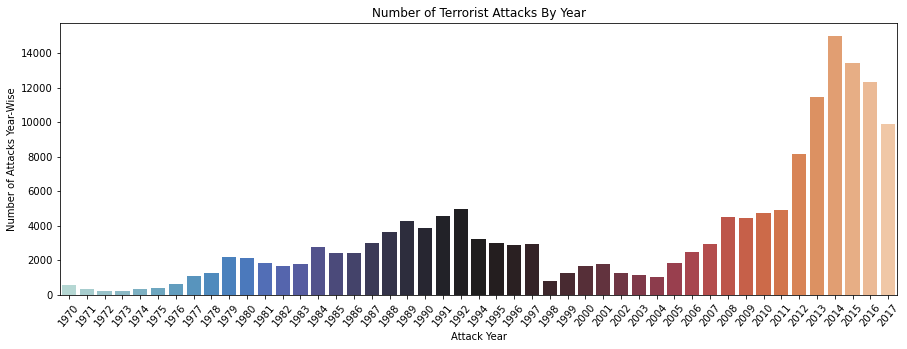

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(datareq['iyear'],palette='icefire')
plt.xticks(rotation = 50)
plt.title('Number of Terrorist Attacks By Year');
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks Year-Wise')
plt.show()

# Number of Terrorist Activities by Region

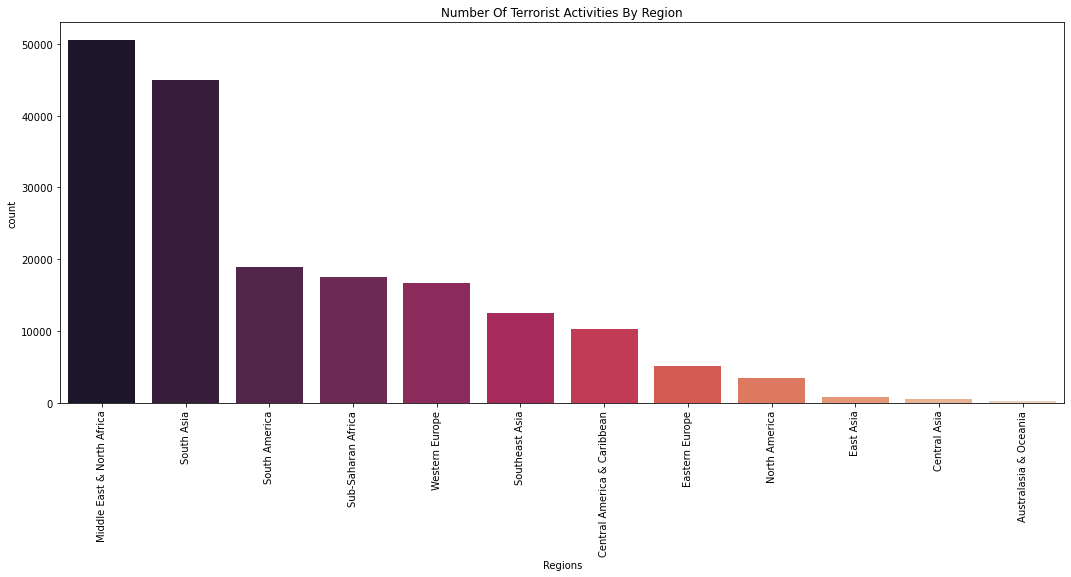

In [17]:
plt.subplots(figsize = (18, 7))
sns.countplot('region_txt', data = data, palette = 'rocket', order = data['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

# Regions where terrorist activities took place each year

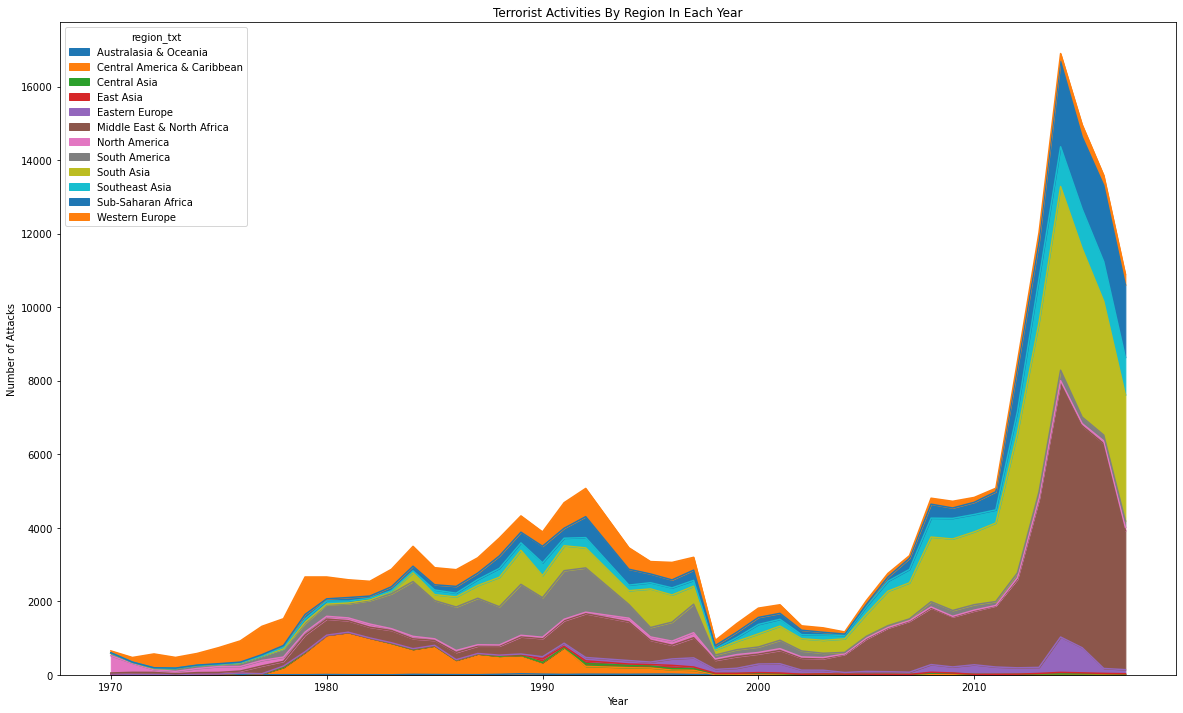

In [18]:
pd.crosstab(data.iyear, data.region_txt).plot(kind = 'area', figsize = (20,12))
plt.title('Terrorist Activities By Region In Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

In [19]:
data['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

# Countries where terrorist activities took place

In [20]:
data['country_txt'].value_counts()[:25]

Iraq                        24636
Pakistan                    14368
Afghanistan                 12731
India                       11960
Colombia                     8306
Philippines                  6908
Peru                         6096
El Salvador                  5320
United Kingdom               5235
Turkey                       4292
Somalia                      4142
Nigeria                      3907
Thailand                     3849
Yemen                        3347
Spain                        3249
Sri Lanka                    3022
United States                2836
Algeria                      2743
France                       2693
Egypt                        2479
Lebanon                      2478
Chile                        2365
Libya                        2249
West Bank and Gaza Strip     2227
Syria                        2201
Name: country_txt, dtype: int64

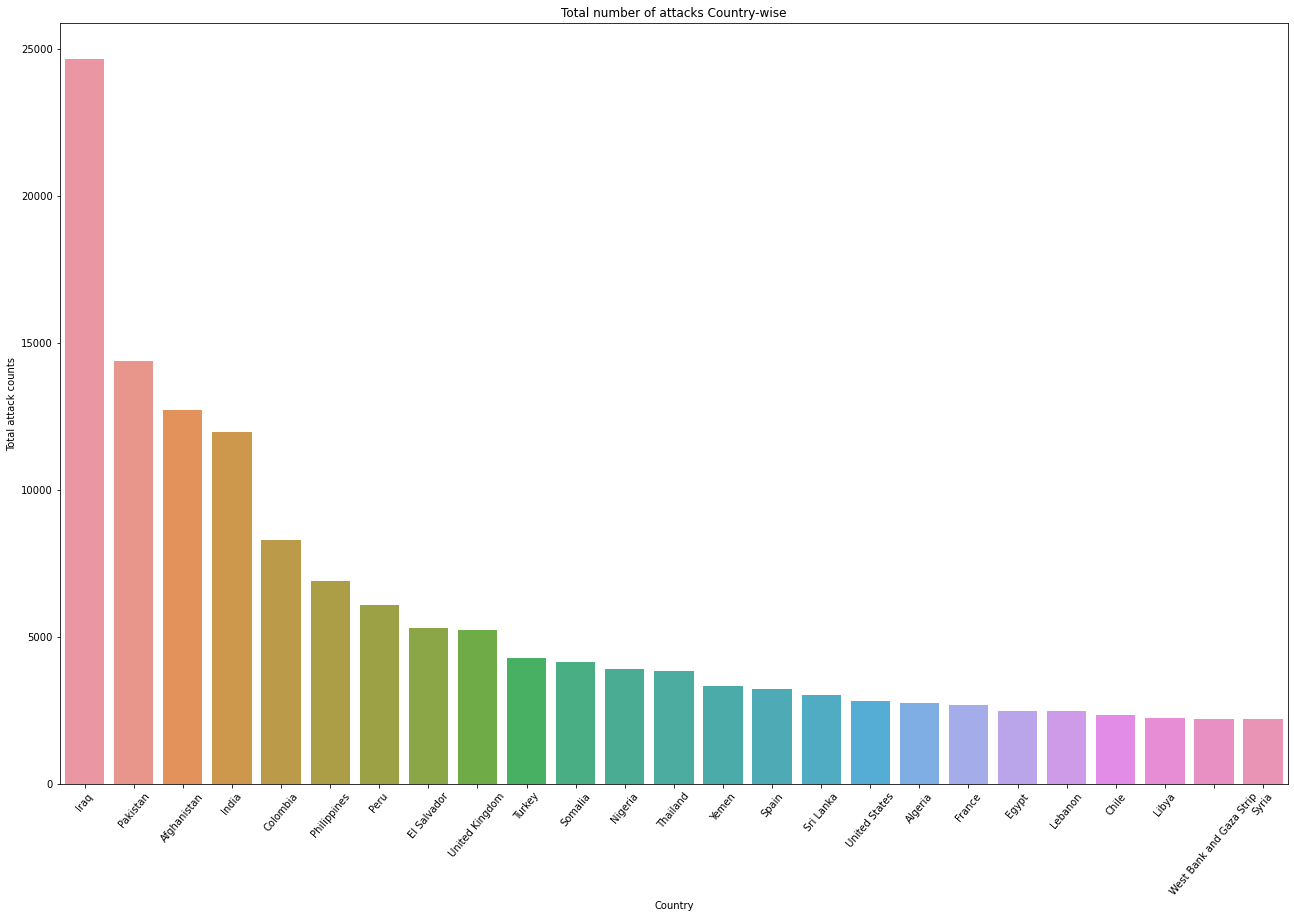

In [21]:
plt.figure(figsize=(22,14))
sns.barplot(x=data['country_txt'].value_counts()[:25].index,y=data['country_txt'].value_counts()[:25].values)
plt.xticks(rotation=50)
plt.title('Total number of attacks Country-wise')
plt.xlabel('Country')
plt.ylabel('Total attack counts')
plt.show()

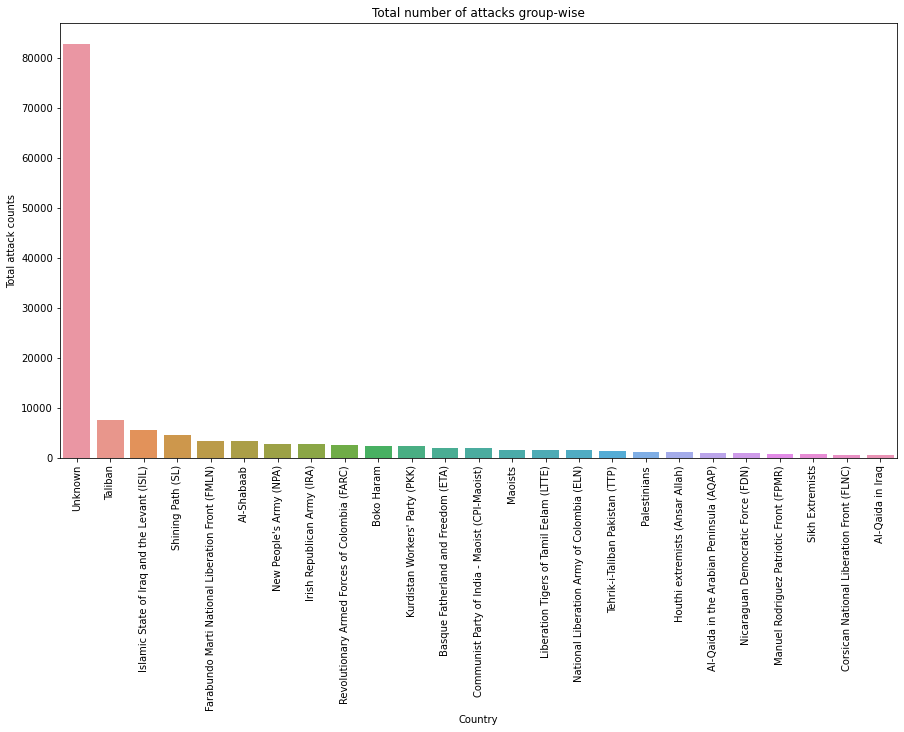

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(x=data['gname'].value_counts()[:25].index,y=data['gname'].value_counts()[:25].values)
plt.xticks(rotation=90)
plt.title('Total number of attacks group-wise')
plt.xlabel('Country')
plt.ylabel('Total attack counts')
plt.show()

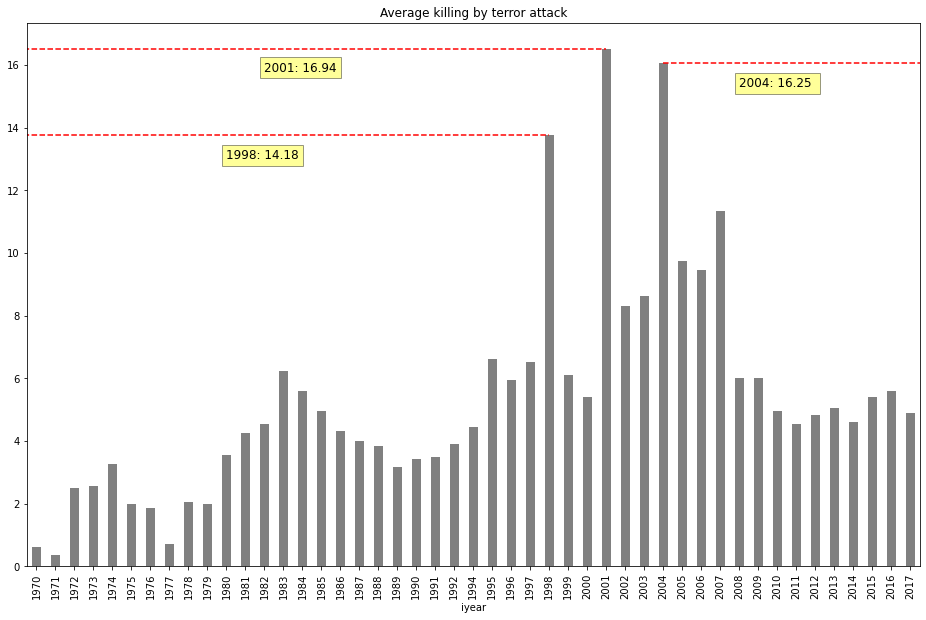

In [23]:
plt.figure(figsize=(16,10))
avg_casualties = datareq.groupby(['iyear'])['casualties'].mean()
avg_casualties.plot.bar(color='grey') 
plt.title('Average killing by terror attack')
plt.hlines(y=avg_casualties.loc[1998],colors='red',xmin=-4,xmax=27,linestyles='--')
plt.hlines(y=avg_casualties.loc[2001],colors='red',xmin=-4,xmax=30,linestyles='--')
plt.hlines(y=avg_casualties.loc[2004],colors='red',xmin=33,xmax=50,linestyles='--')
plt.text(10, 13, '1998: 14.18',fontsize=12,bbox=dict(facecolor='yellow', alpha=0.4))
plt.text(12, 15.8, '2001: 16.94',fontsize=12,bbox=dict(facecolor='yellow', alpha=0.4))
plt.text(37, 15.3, '2004: 16.25 ',fontsize=12,bbox=dict(facecolor='yellow', alpha=0.4))
plt.show()

# Total count of Attack types

In [24]:
data['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

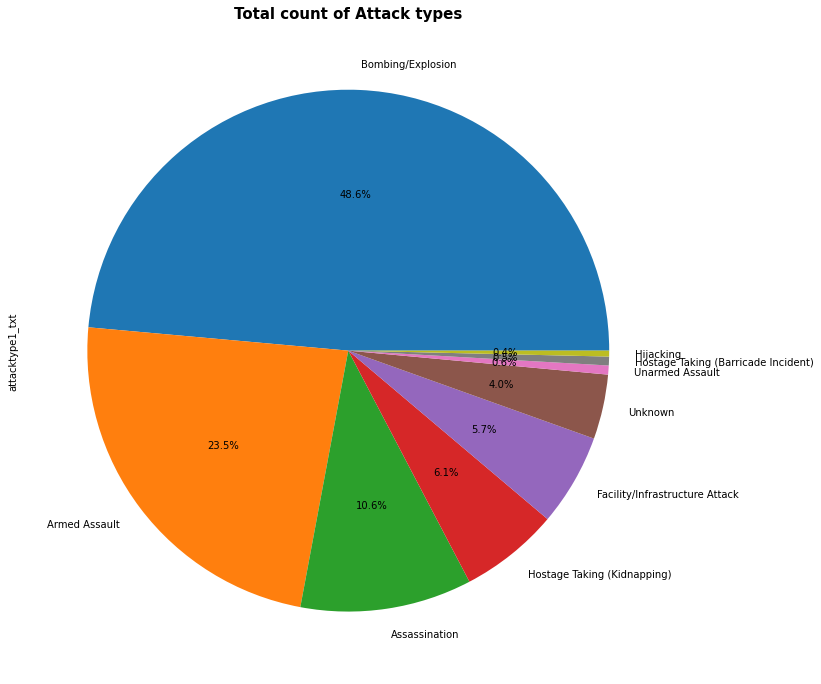

In [25]:
plt.figure(figsize=(15,12))
data['attacktype1_txt'].value_counts().plot.pie(autopct= '%1.1f%%')
plt.title('Total count of Attack types',fontsize='15',fontweight='bold')
plt.show()

# Total count of attack on differnt target type

In [26]:
data['targtype1_txt'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

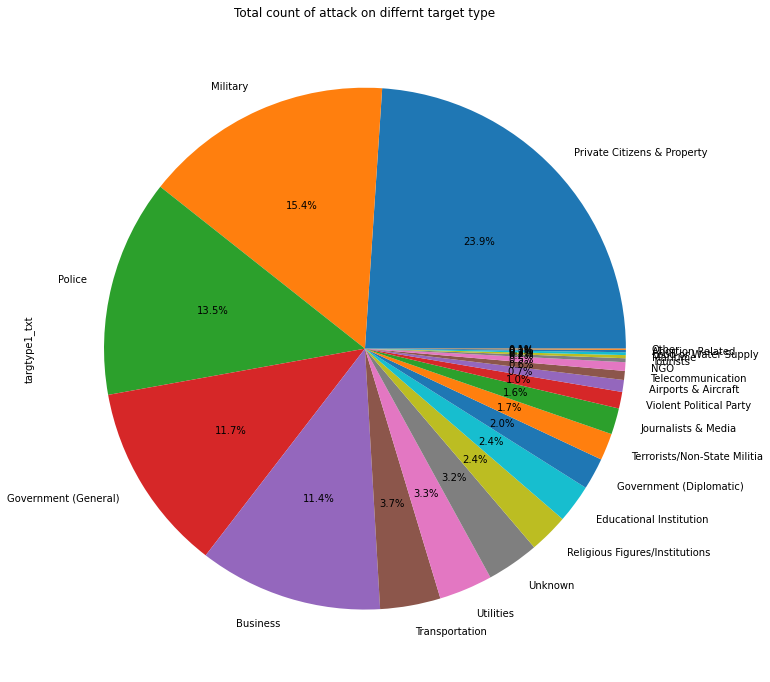

In [27]:
plt.figure(figsize=(15,12))
data['targtype1_txt'].value_counts().plot.pie(autopct= '%1.1f%%')
plt.title('Total count of attack on differnt target type')
plt.show()

# Terror Attacks of a Certain Year with their Location

In [28]:
AttackYear = data['iyear'] == 2010

In [29]:
AttackData = data[AttackYear]
reqAttackData = AttackData.loc[:,'city':'longitude'] 
reqAttackData = reqAttackData.dropna() 
reqAttackDataList = reqAttackData.values.tolist()

In [30]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqAttackDataList)):
    folium.Marker(location=[reqAttackDataList[point][1],reqAttackDataList[point][2]], popup = reqAttackDataList[point][0]).add_to(markerCluster)
map

# Number of people killed in Terror Attacks¶

In [31]:
killData = data.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


In [32]:
attackData = data.loc[:,'attacktype1':'attacktype1_txt']

typeKillData = pd.concat([attackData, killData], axis=1)

In [33]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt  Armed Assault  Assassination  Bombing/Explosion  \
nkill                 160297.0        24920.0           157321.0   

attacktype1_txt  Facility/Infrastructure Attack  Hijacking  \
nkill                                    3642.0     3718.0   

attacktype1_txt  Hostage Taking (Barricade Incident)  \
nkill                                         4478.0   

attacktype1_txt  Hostage Taking (Kidnapping)  Unarmed Assault  Unknown  
nkill                                24231.0            880.0  32381.0

# Number of people killed as in Terror Attacks by Countries

In [34]:
countryData = data.loc[:,'country':'country_txt']

countryKillData = pd.concat([countryData, killData], axis=1)

In [35]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt  Afghanistan  Albania  Algeria  Andorra  Angola  \
nkill            39384.0     42.0  11066.0      0.0  3043.0   

country_txt  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  ...  \
nkill                        0.0      490.0     37.0       23.0     30.0  ...   

country_txt  Vietnam  Wallis and Futuna  West Bank and Gaza Strip  \
nkill            1.0                0.0                    1500.0   

country_txt  West Germany (FRG)  Western Sahara   Yemen  Yugoslavia  Zaire  \
nkill                      97.0             1.0  8776.0       119.0  324.0   

country_txt  Zambia  Zimbabwe  
nkill          70.0     154.0  

[1 rows x 205 columns]

In [36]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

# Number of people killed by countries

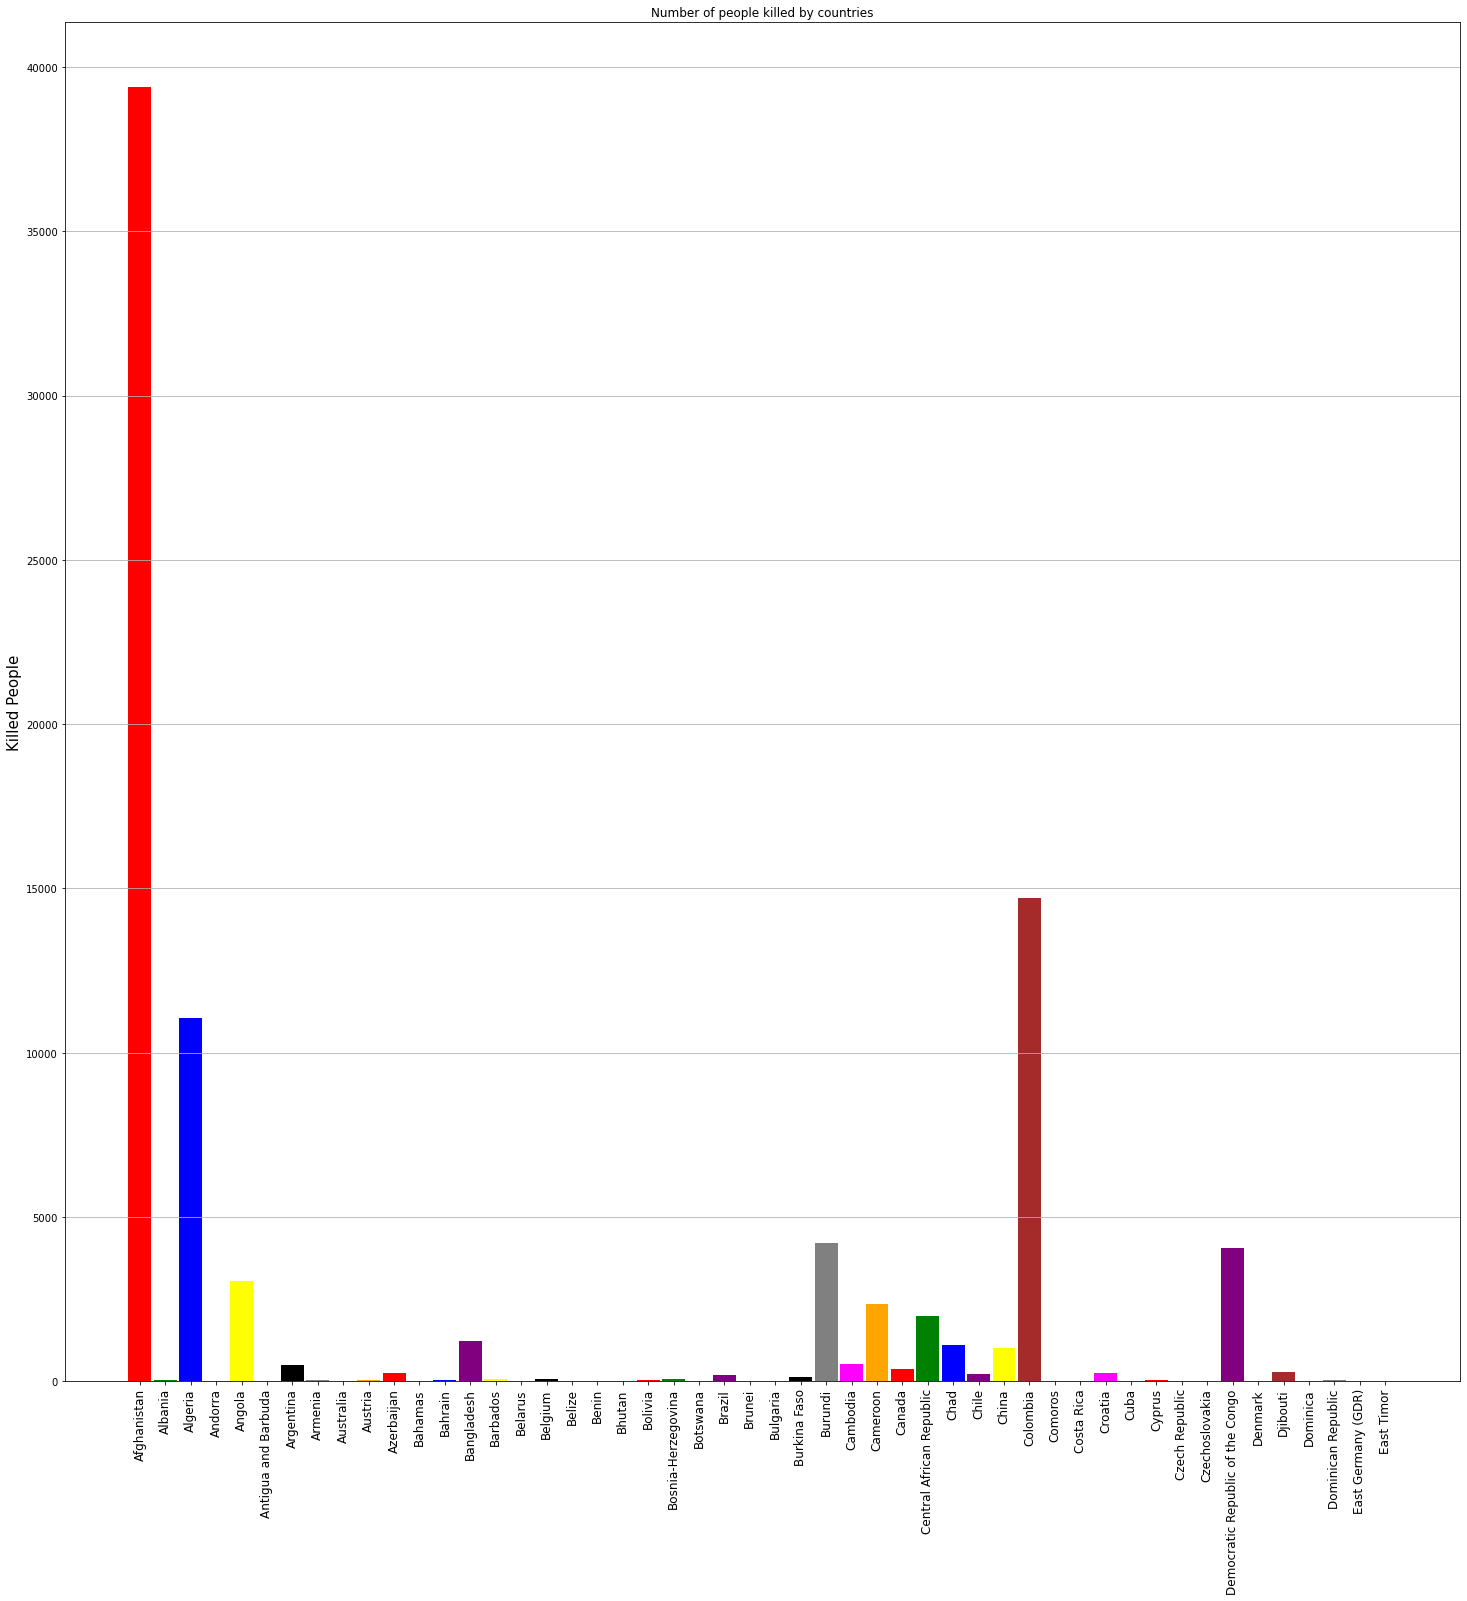

In [37]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()


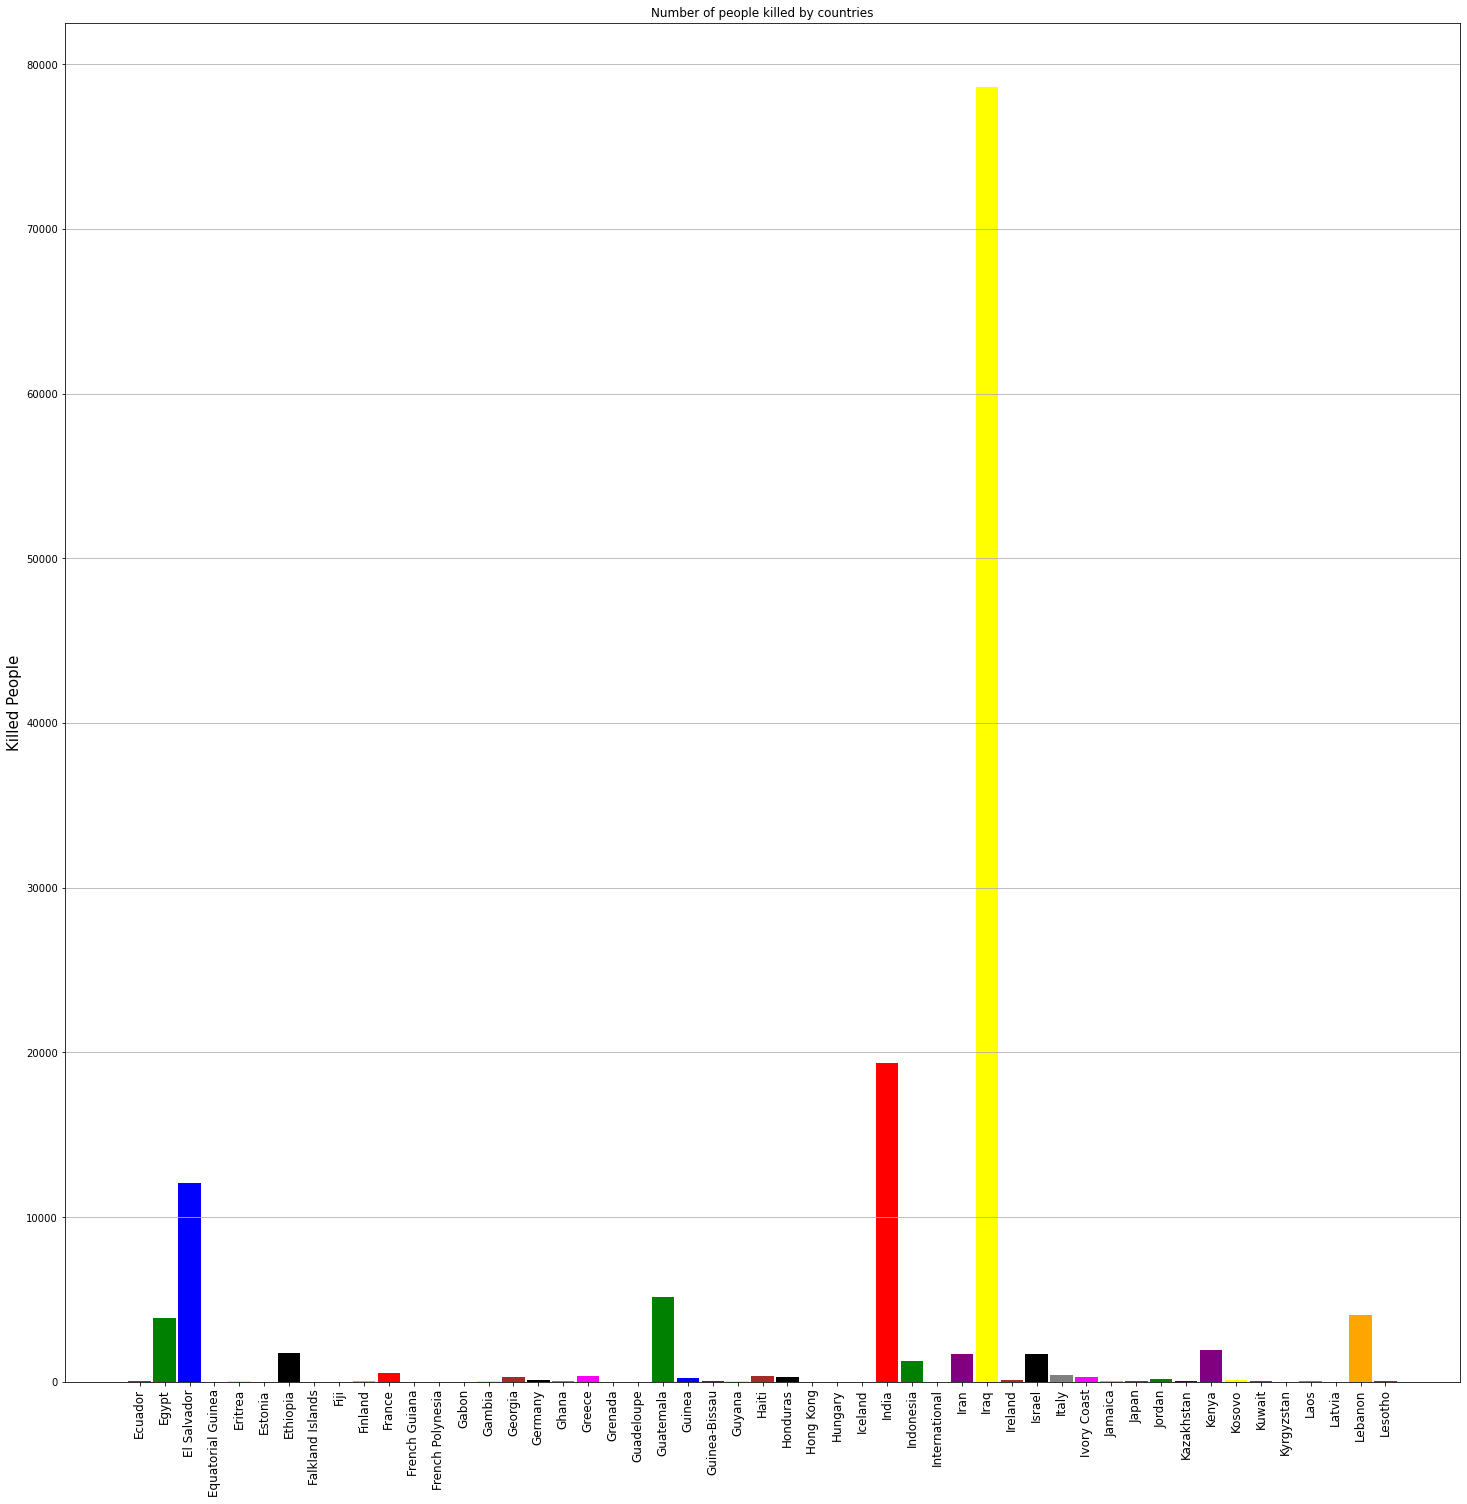

In [38]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

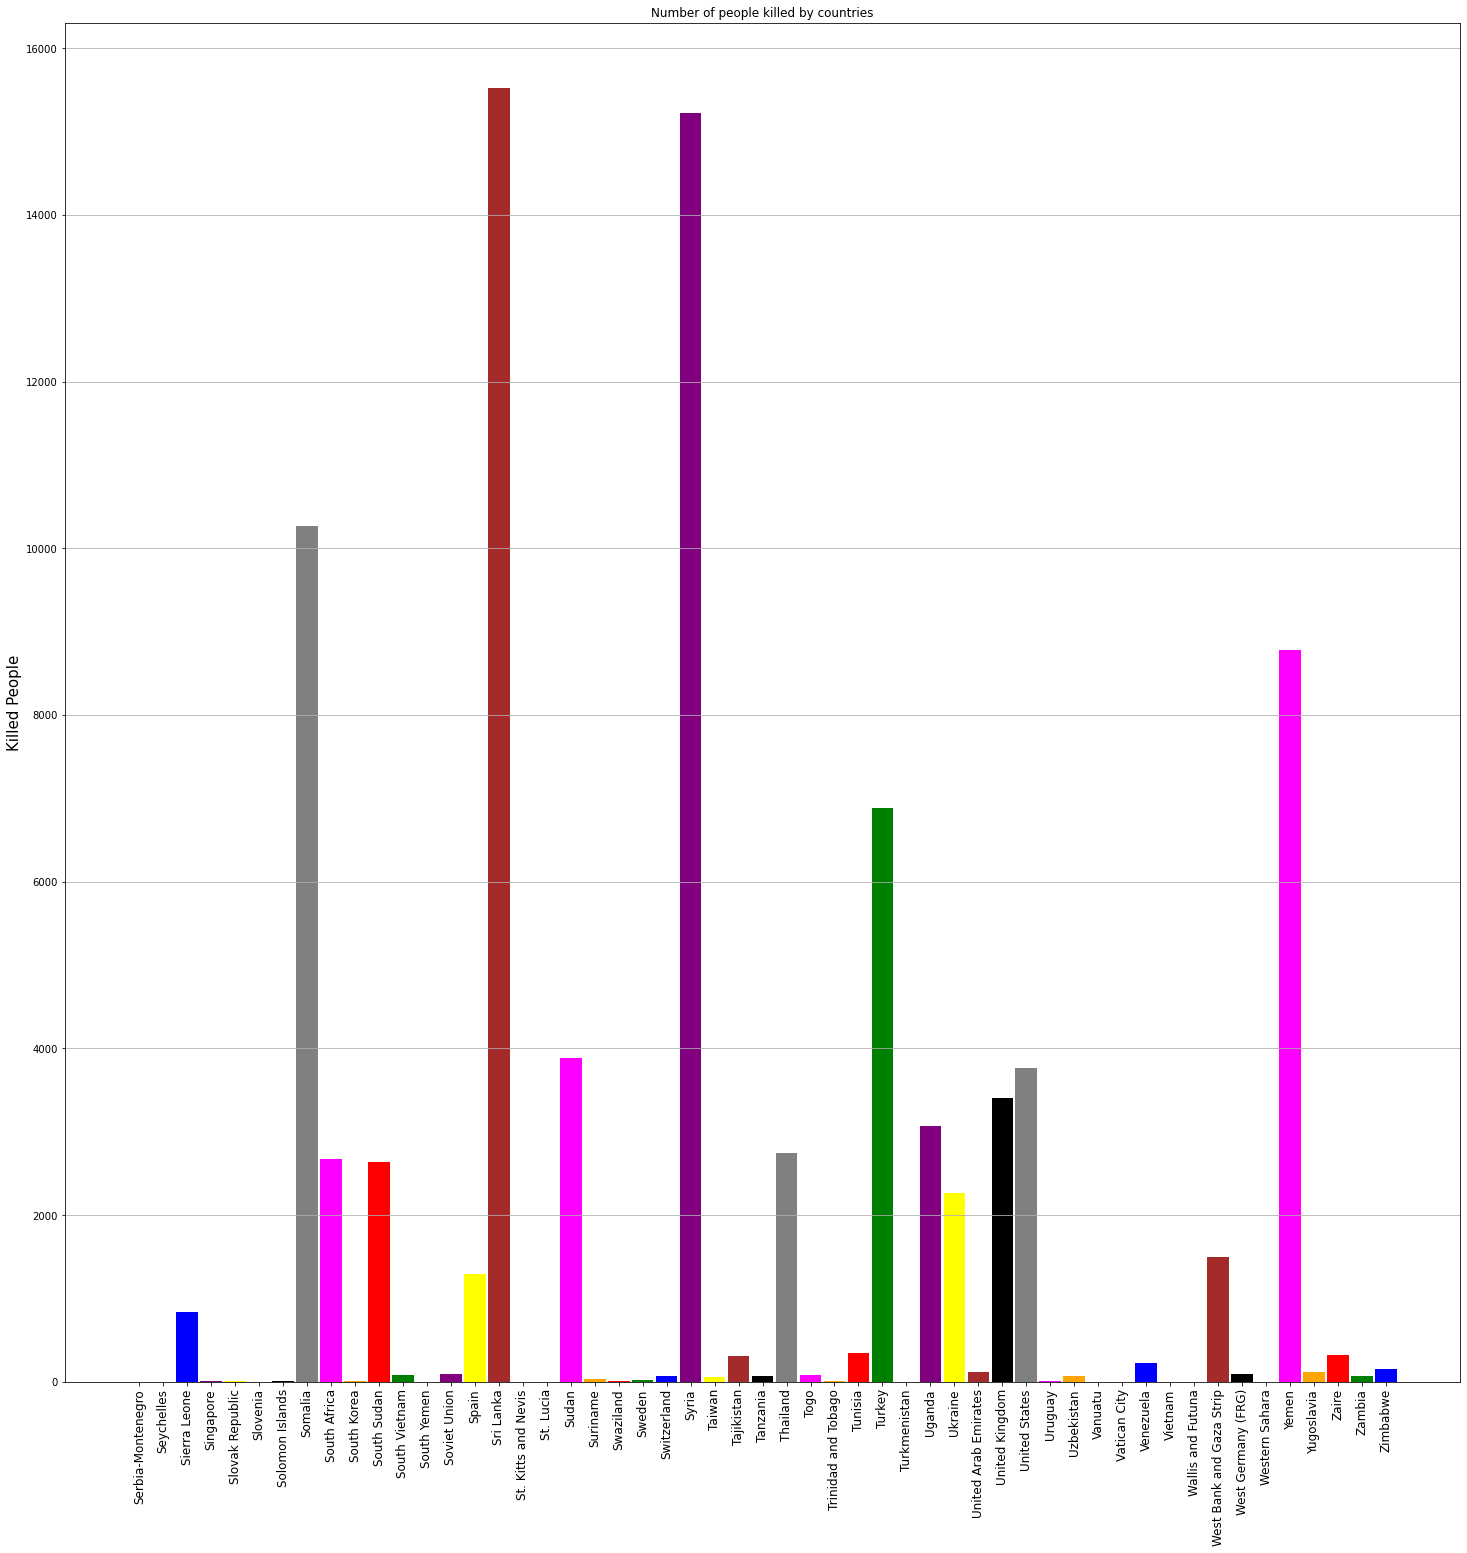

In [39]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

# Conclusion
Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks.

In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.

# Recommendation
    ---Since Private Citizens and Property are being targeted consistently so stronger security and surveillance should be  provided, especially in the dense populated regions.
    ---More surveillance is required especially in the Middle East & North African Regions.
    ---Strict border policy should be implemented to prevent the movement of explosives between the regions.


# Thank You!